# サッカーW杯の画像分析

OpenCVを使います。下記のような具合にインストールしましょう。

- conda install -c conda-forge opencv
- pip install opencv-python

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import copy

In [2]:
in_file  = "goal_scene.mov"       # 入力映像ファイル名
cap = cv2.VideoCapture( in_file ) # ファイルを開く
w = round( cap.get(cv2.CAP_PROP_FRAME_WIDTH) )
h = round( cap.get(cv2.CAP_PROP_FRAME_HEIGHT) )

In [3]:
frames = [] # 入力映像の全フレームを読み込む
while(cap.isOpened()):    
    ret, frame = cap.read()
    if ret:
        frames.append(frame)
    else:
        break
cap.release()

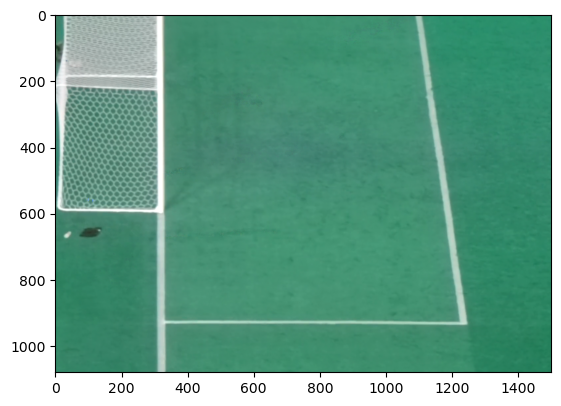

In [6]:
frames = np.array(frames) # 映像をnumpy多次元リストにしておく
background_image = np.empty([h,w,3]) # 選手を消した背景画像用
for y in range(h):         # 映像の各x,y位置での時系列方向リスト
    for x in range(w):     # から最頻値(mode)を求めると、
        for i in range(3): # 選手が消えて、背景情報だけになる
            mode, _ = stats.mode(frames[:,y,x,i], axis=None)
            background_image[y,x,i]=mode[0]
# 背景画像を表示する
plt.imshow(background_image[:,:1500,:]/255.)

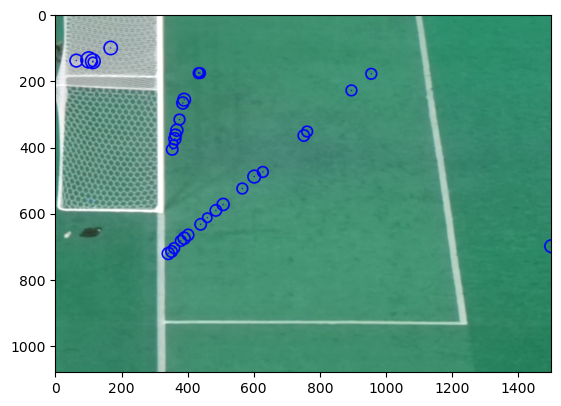

In [13]:
out_background_image = np.array(background_image,dtype=np.uint8)

# ボール抽出に使う「円形状抽出の条件設定」
min_radius = 12   # 抽出円の最小サイズ（ピクセル）
max_radius = 25   # 抽出円の最大サイズ（ピクセル）
min_distance = 50 # 抽出円間の最小距離（ピクセル）

for frame in frames: # 時系列方向にボールを検出
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)        
    # 円形状を検出
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 
        1,  # 画像分解能に対する投票分解能比率逆数(1⇒等倍サンプリング)
        min_distance,
        param1=21, param2=30, # 円形状抽出条件(必要に応じて調整)
        minRadius=min_radius, maxRadius=max_radius)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]: # 検出した円形の中心と外周を描く
            cv2.circle(out_background_image,(i[0],i[1]),   0,(0,0,255),3)
            cv2.circle(out_background_image,(i[0],i[1]),i[2],(0,0,255),3)
plt.imshow(out_background_image[:,:1500,:]/255.)
plt.savefig('fig.png', dpi=300)

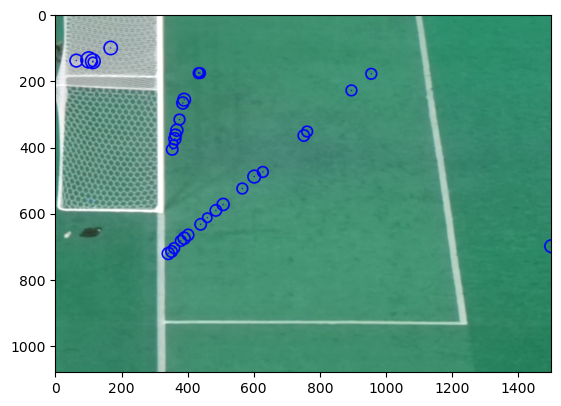

In [24]:
plt.imshow(out_background_image[:,:1500,:]/255.)
plt.savefig('myfig.png', dpi=1000)

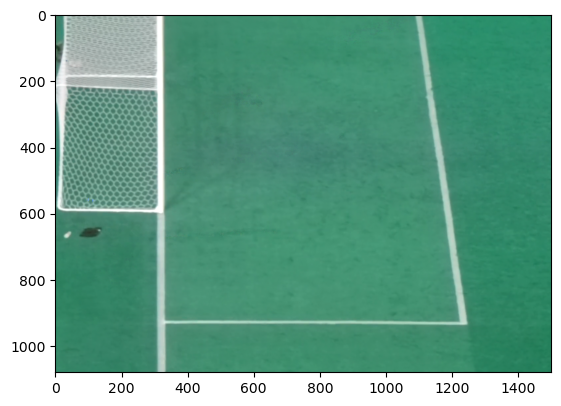

In [25]:
plt.imshow(background_image[:,:1500,:]/255.)
plt.savefig('myfig0.png', dpi=1000)